In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv("../data/train_featured.csv")
y = data['Survived']
X = data.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

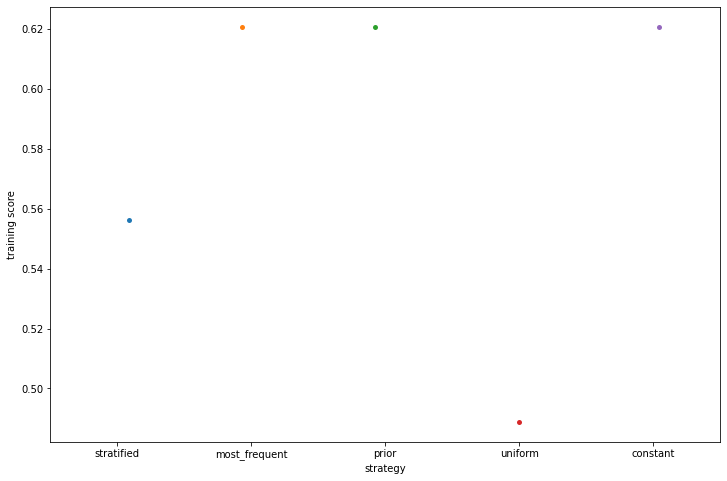

In [4]:
def define_strategy(X_train, y_train):
    plt = matplotlib.pyplot.gcf()
    plt.set_size_inches(12, 8)
    strats = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']
    train_dummy_scores = {}
    
    for clfs in strats:
        if clfs == 'constant':
            dummy_clf = DummyClassifier(strategy = clfs, random_state = 0, constant = 0)
        else: 
            dummy_clf = DummyClassifier(strategy = clfs, random_state = 0)
        dummy_clf.fit(X_train, y_train)
        score = dummy_clf.score(X_train, y_train)
        train_dummy_scores[clfs] = score

    values = list(train_dummy_scores.values())
    ax = sns.stripplot(strats, values); 
    ax.set(xlabel ='strategy', ylabel ='training score')
    plt.savefig('../plots/strategies.jpg')

define_strategy(X_train, y_train)

In [5]:
def build_dummy():
    dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 0)
    dummy_clf.fit(X_train, y_train)
    dummy_clf.score(X_train, y_train)
    return dummy_clf

dummy_clf = build_dummy()

In [6]:
dummy_clf.score

<bound method DummyClassifier.score of DummyClassifier(random_state=0, strategy='most_frequent')>

In [7]:
def simple_regression(training_cols):
    model = LogisticRegression(C=0.1, max_iter = 1000)
    model.fit(X_train[training_cols], y_train)
    score = model.score(X_train[training_cols], y_train)
    model.predict(X_train[training_cols]) 
    coef = model.coef_
    intercept = model.intercept_
    return coef, intercept, score, model

columns = [ 'Mrs', 'Miss', 'Age_ranges', 'Pclass', 'Sex', 'SibSp', 'qbin_Age2', 'Parch', 'Cabin_C']

coef, intercept, score, model = simple_regression(columns)
print("Simple regression results:\nscore: " + str(score), \
      "\ncoef: " + str(coef), "\nintercept: " + str(intercept))

Simple regression results:
score: 0.8132022471910112 
coef: [[ 0.22864778  0.64563804 -0.42415565 -0.91703767  1.88638237 -0.24757619
  -0.07804322 -0.03014005 -0.13505305]] 
intercept: [2.29530001]


In [8]:
coef, intercept

(array([[ 0.22864778,  0.64563804, -0.42415565, -0.91703767,  1.88638237,
         -0.24757619, -0.07804322, -0.03014005, -0.13505305]]),
 array([2.29530001]))

In [9]:
def accuracy(X_train, training_cols):
    y_pred_dummy = dummy_clf.predict(X_train)
    y_pred_lr = model.predict(X_train[training_cols])
    accuracy = accuracy_score(y_train, y_pred_dummy)
    return accuracy

accuracy = accuracy(X_train, columns)
accuracy

0.6207865168539326

In [11]:
def confusion_matrix_(model, training_cols, X_train, y_train, dummy_clf): ## AQUI VOY 
    plt = matplotlib.pyplot.gcf()
    plt.set_size_inches(12, 8)
    f = plt.figure()
    plot_confusion_matrix(model, X_train[training_cols], y_train)
    f.savefig('../plots/model_confusion_matrix.jpg')
    #plt.show()
    #plot_confusion_matrix(dummy_clf, X_train, y_train)
    #plt.savefig('../plots/dummy_confusion_matrix.jpg')

confusion_matrix(model, columns, X_train, y_train, dummy_clf)


TypeError: 'NoneType' object is not callable

<Figure size 864x576 with 0 Axes>

In [ ]:

plt.title('Confusion matrix for our classifier')
plt.show(cm)

In [ ]:
cm